In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random

In [ ]:
GRID_SIZE = 100
EMPTY_HOUSE_RATIO = 0.1
BLUE_PARTY_RATIO = .5
RED_PARTY_RATIO = 1-BLUE_PARTY_RATIO
BLUE_EFFECTIVE_RATIO = (1-EMPTY_HOUSE_RATIO) * BLUE_PARTY_RATIO
RED_EFFECTIVE_RATIO = (1-EMPTY_HOUSE_RATIO) * RED_PARTY_RATIO
#Any ratio of bad / total neighbors above this value results in an unhappy agent
RELOCATION_THRESHOLD = 0.4
EMPTY = 0
BLUE = 1
RED = 2

**Visualization Function**

In [9]:
def visualize(grid_in, title):
    colors = ['white', 'blue', 'red']
    cmap = ListedColormap(colors)

    print("Visualizing: \n")
    plt.figure(figsize=(8, 8))
    plt.imshow(grid_in, cmap=cmap, interpolation='nearest')

    plt.title(title)
    plt.show()

    print("Done.")

In [10]:
flat_grid = np.random.choice(
    [EMPTY, BLUE, RED],
    size = GRID_SIZE*GRID_SIZE,
    p=[EMPTY_HOUSE_RATIO, BLUE_EFFECTIVE_RATIO, RED_EFFECTIVE_RATIO]
)

Visualizing: 



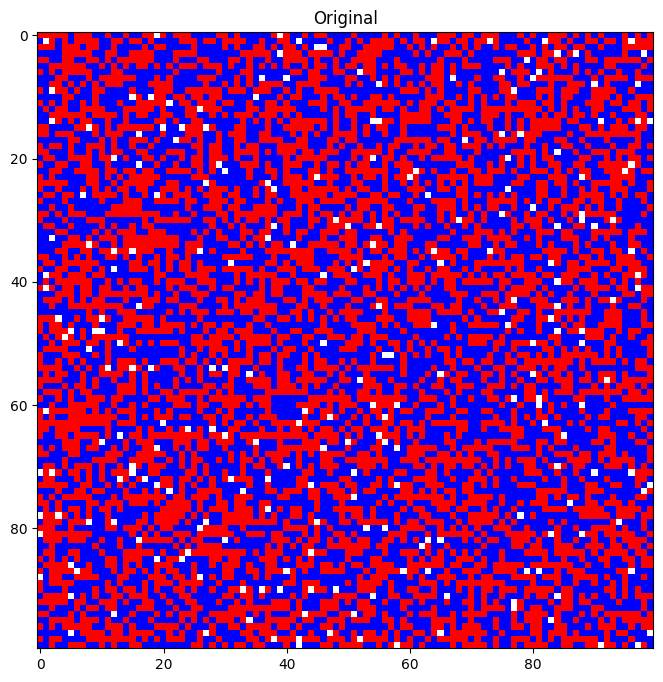

Done.


In [11]:
grid = flat_grid.reshape(GRID_SIZE,GRID_SIZE)
visualize(grid, "Original")

Starting simulation

Iteration: 1 There are 6354 unhappy agents and 246 empty spots

Iteration: 2 There are 4607 unhappy agents and 246 empty spots

Iteration: 3 There are 3351 unhappy agents and 246 empty spots

Iteration: 4 There are 2577 unhappy agents and 246 empty spots

Iteration: 5 There are 2045 unhappy agents and 246 empty spots

Iteration: 6 There are 1690 unhappy agents and 246 empty spots

Iteration: 7 There are 1472 unhappy agents and 246 empty spots

Iteration: 8 There are 1310 unhappy agents and 246 empty spots

Iteration: 9 There are 1199 unhappy agents and 246 empty spots

Iteration: 10 There are 1121 unhappy agents and 246 empty spots

Iteration: 11 There are 1037 unhappy agents and 246 empty spots

Iteration: 12 There are 980 unhappy agents and 246 empty spots

Iteration: 13 There are 946 unhappy agents and 246 empty spots

Iteration: 14 There are 889 unhappy agents and 246 empty spots

Iteration: 15 There are 826 unhappy agents and 246 empty spots

Iteration: 16 The

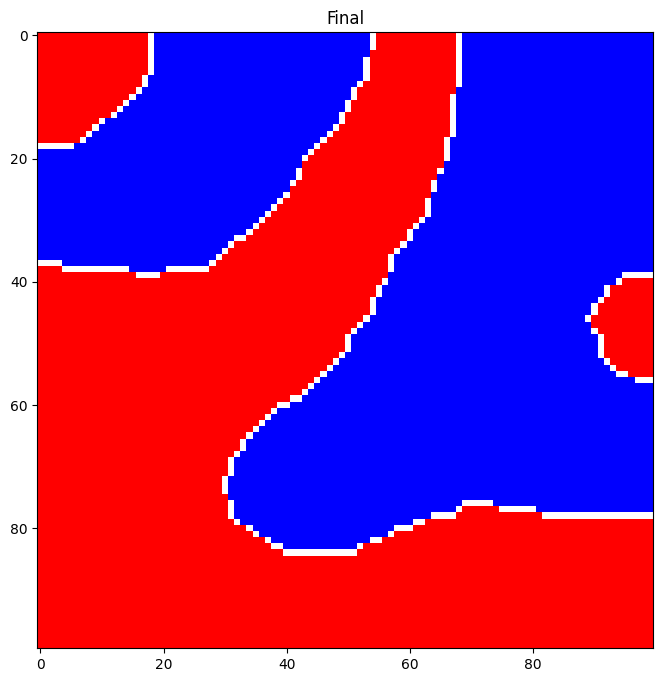

Done.


In [12]:
#identify unhappy agents and available indices
def identify(grid):
    unhappy_agents = []
    empty_spots = []
    for row in range(GRID_SIZE):
        for col in range(GRID_SIZE):
            #tally neighbors
            if grid[row][col] != EMPTY:
                total_neighbors = 0
                bad_neighbors = 0
                for neighbor_row in range(max(0, row-1), min(GRID_SIZE, row+2)):
                    for neighbor_col in range(max(0, col-1), min(GRID_SIZE, col+2)):
                        if(neighbor_row != row or neighbor_col != col):
                            if(grid[neighbor_row][neighbor_col] != grid[row][col] and grid[neighbor_row][neighbor_col] != EMPTY):
                                bad_neighbors+=1
                            if grid[neighbor_row][neighbor_col] != EMPTY:
                                total_neighbors+=1
                if(not total_neighbors or bad_neighbors / total_neighbors > RELOCATION_THRESHOLD):
                    unhappy_agents.append((row,col))
            else: 
                empty_spots.append((row,col))
    return unhappy_agents, empty_spots

def relocate(grid_in, unhappy_in, empty_in):
   for agent in unhappy_in:
       destination = random.choice(empty_in)
       destination_r, destination_c = destination
       agent_r, agent_c = agent
       grid_in[destination_r][destination_c] = grid_in[agent_r][agent_c]
       grid_in[agent_r][agent_c] = EMPTY
       empty_in.remove(destination)
       empty_in.append(agent)

continue_loop = True
count = 0
print("Starting simulation\n")
while continue_loop:
    count+=1
    unhappy, empty = identify(grid)
    if not unhappy:
        continue_loop = False
    else:
        print(f"Iteration: {count} There are {len(unhappy)} unhappy agents and {len(empty)} empty spots" + "\n")
        relocate(grid, unhappy, empty)
print(f"Simulation finished after {count} iterations" + "\n")

visualize(grid, "Final")